In [1]:
!nvidia-smi

Wed Jul 10 11:22:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [15]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8InREatOTxzjjq1zlNcC")
project = rf.workspace("ssd-detection").project("hard-disk-detection")
version = project.version(3)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [23]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.52 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/hard-disk-detection-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fa

loading Roboflow workspace...
loading Roboflow project...


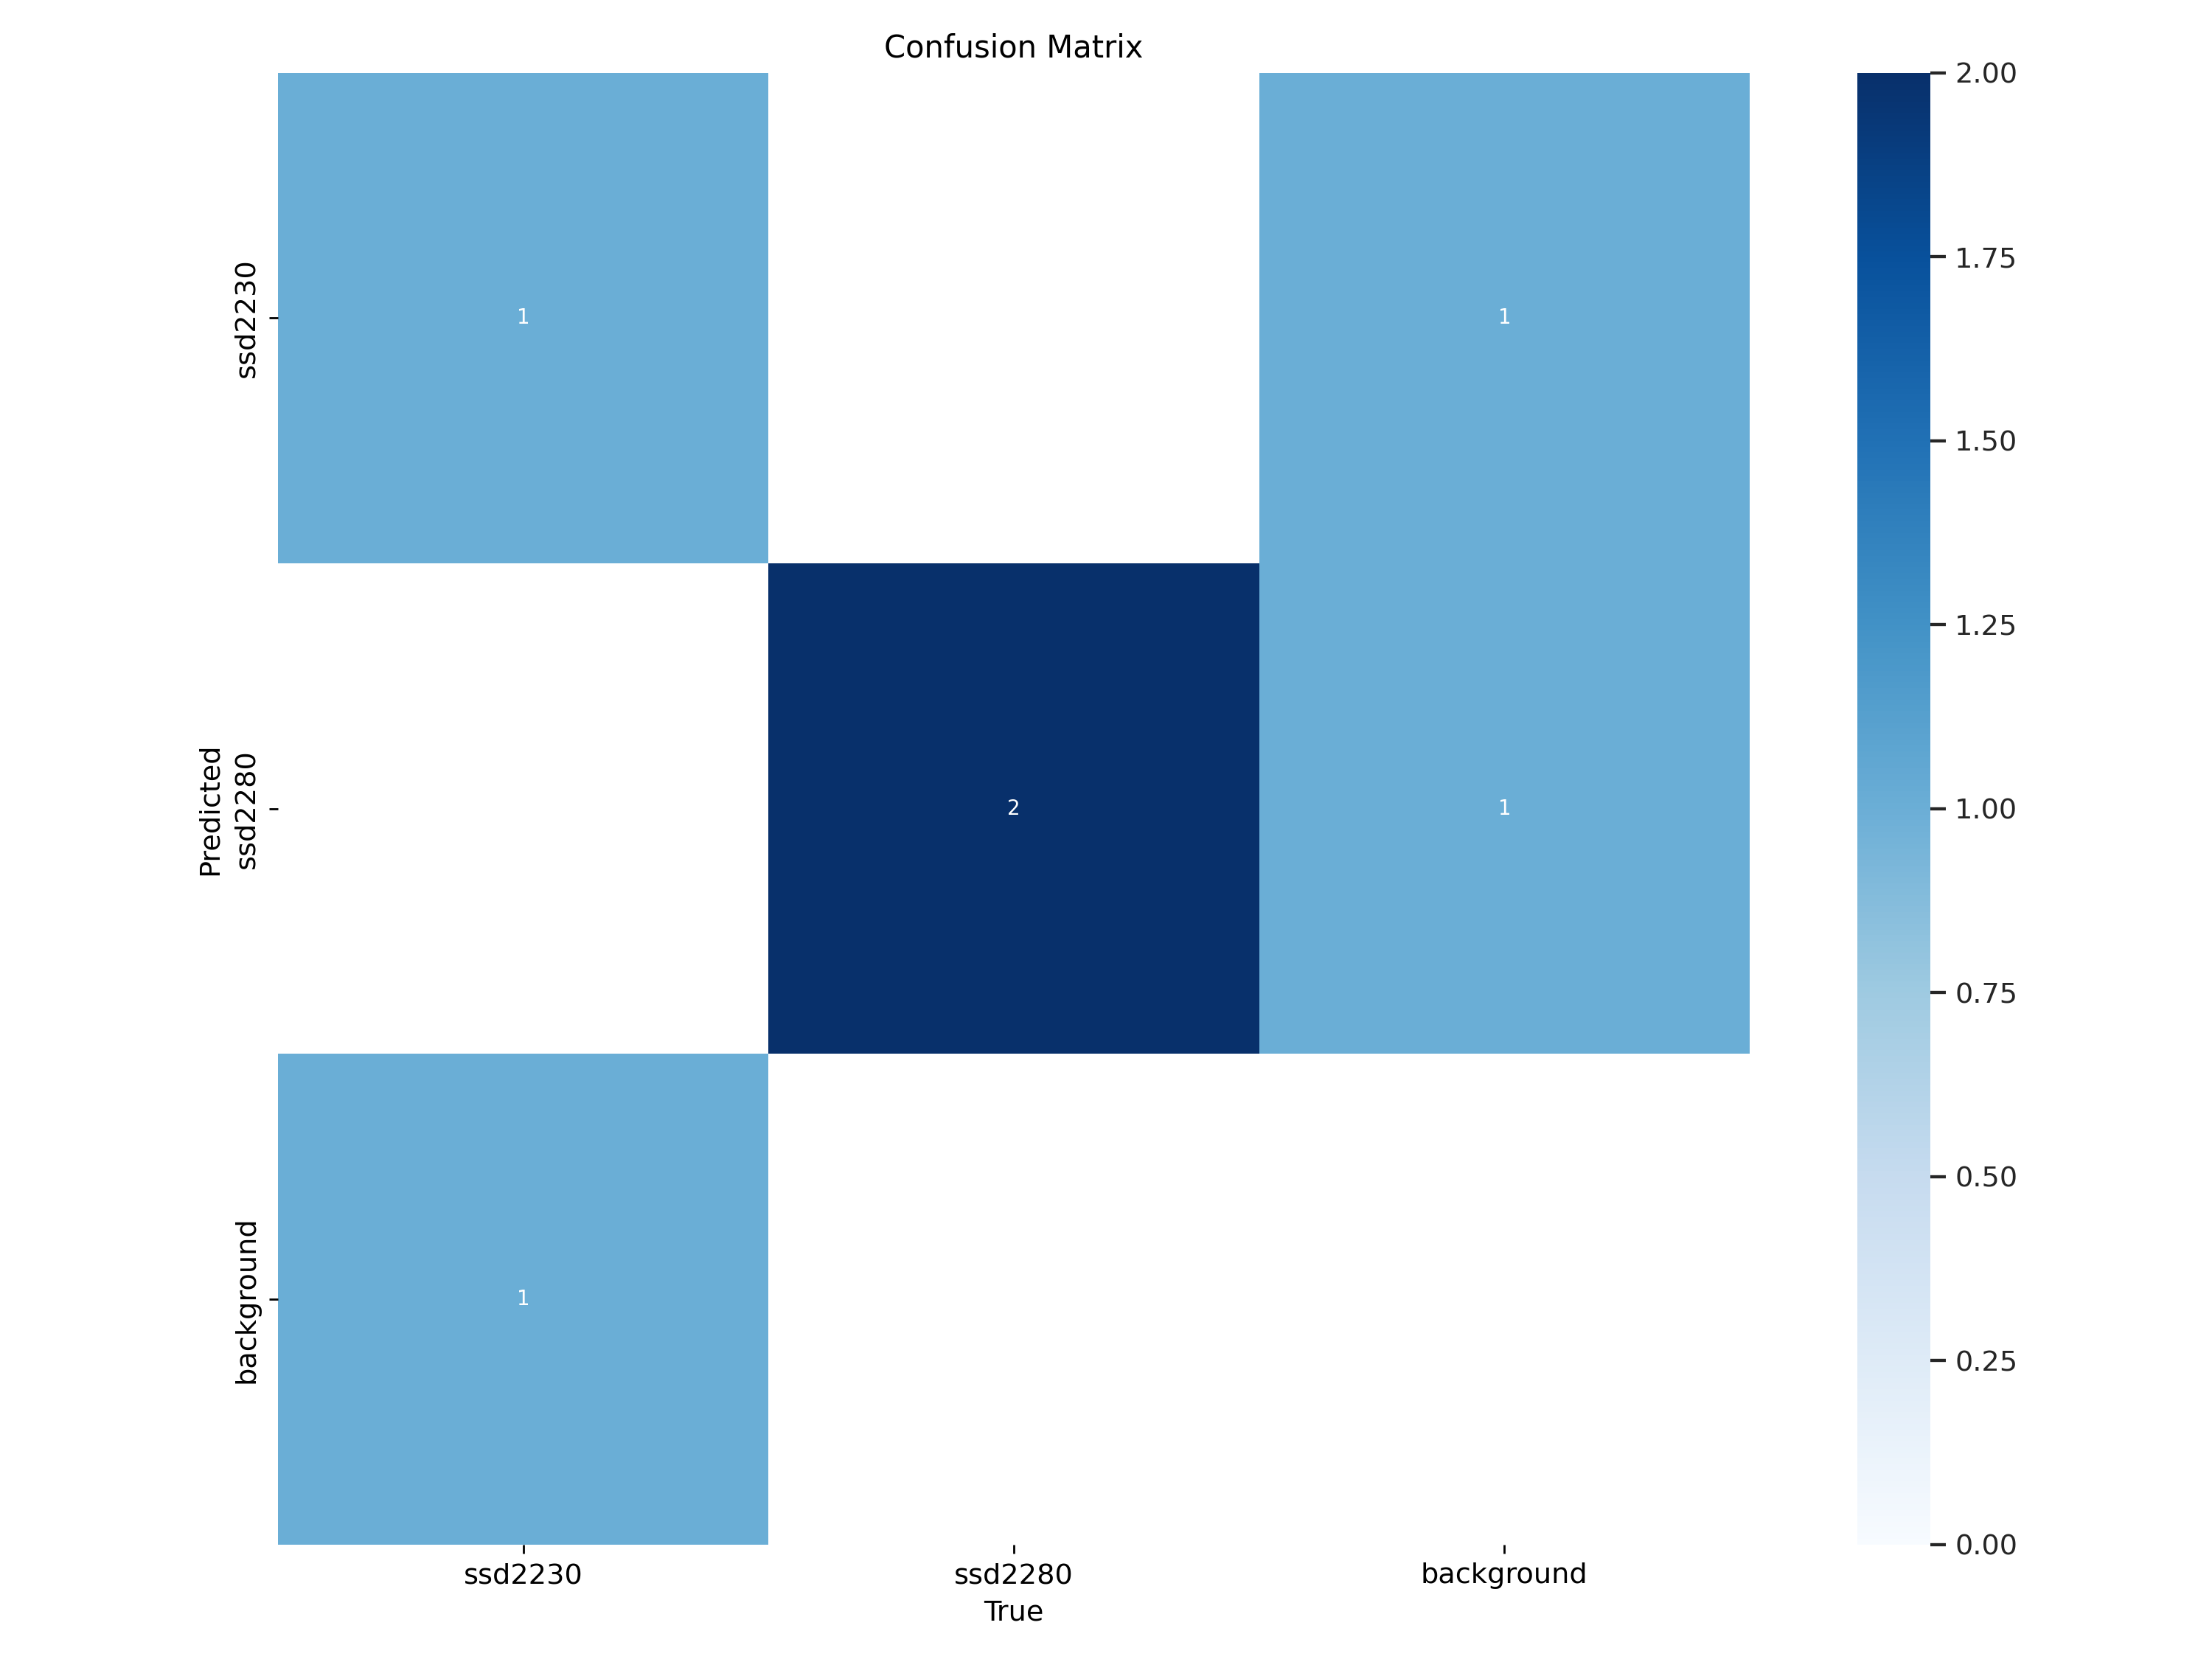

In [24]:
import os
from IPython.display import Image


rf = Roboflow(api_key="8InREatOTxzjjq1zlNcC")
project = rf.workspace("ssd-detection").project("hard-disk-detection")
version = project.version(3)
dataset = version.download("yolov8")

HOME = os.getcwd()
conf_matrix_path = f"{HOME}/runs/detect/train/confusion_matrix.png"

Image(filename=conf_matrix_path, width=600)


loading Roboflow workspace...
loading Roboflow project...


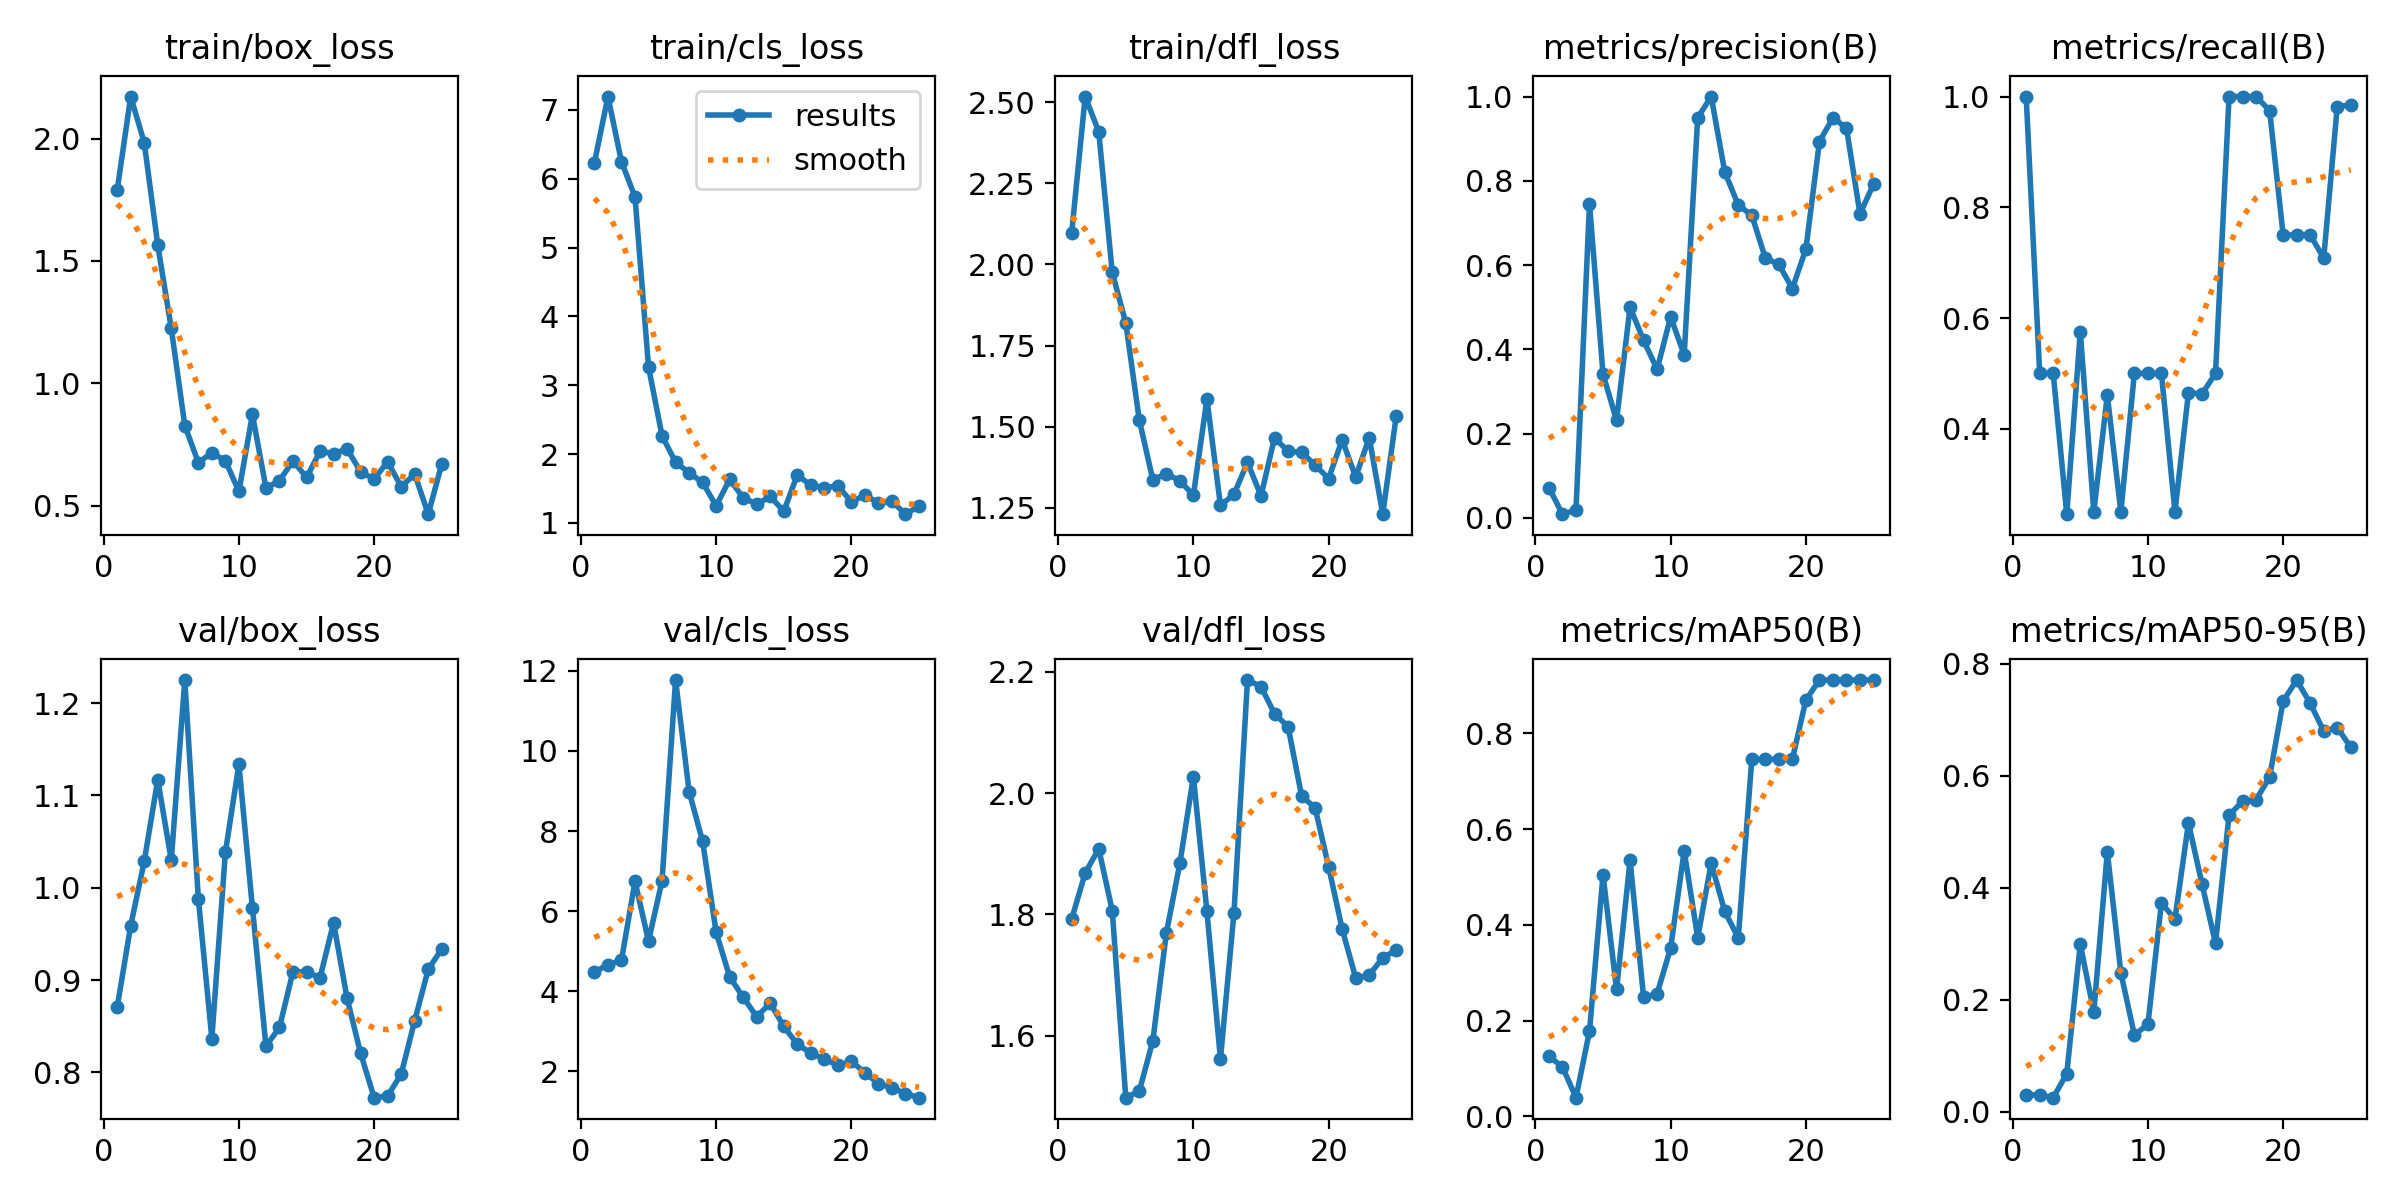

In [25]:
import os
from IPython.display import Image

rf = Roboflow(api_key="8InREatOTxzjjq1zlNcC")
project = rf.workspace("ssd-detection").project("hard-disk-detection")
version = project.version(3)
dataset = version.download("yolov8")

HOME = os.getcwd()
results_image_path = f"{HOME}/runs/detect/train/results.png"

Image(filename=results_image_path, width=600)


loading Roboflow workspace...
loading Roboflow project...


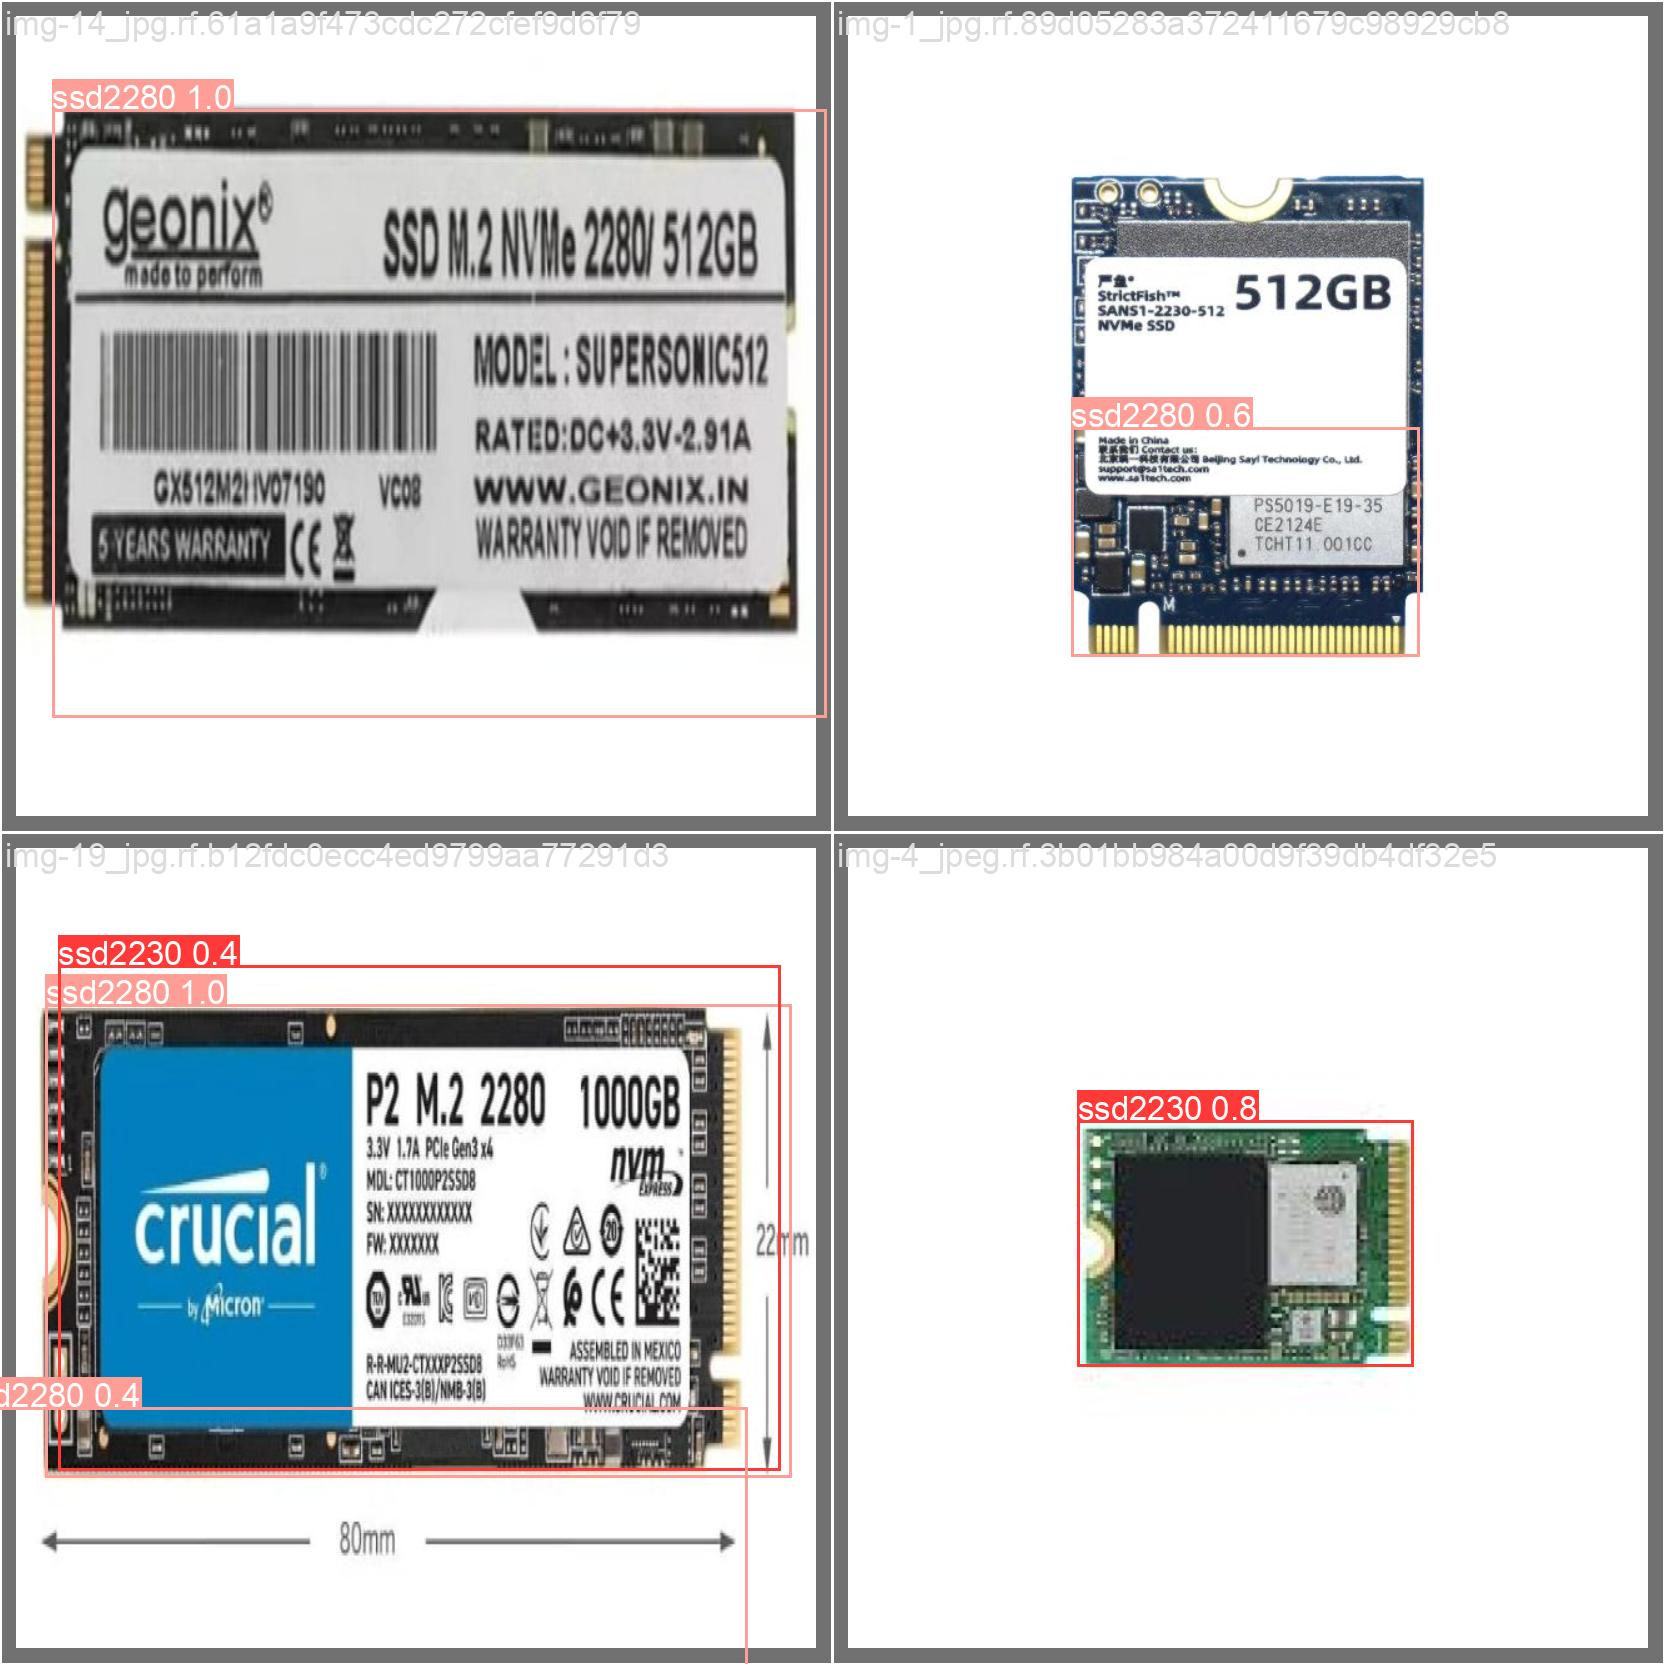

In [26]:
import os
from IPython.display import Image

rf = Roboflow(api_key="8InREatOTxzjjq1zlNcC")
project = rf.workspace("ssd-detection").project("hard-disk-detection")
version = project.version(3)
dataset = version.download("yolov8")

HOME = os.getcwd()
val_batch_image_path = f"{HOME}/runs/detect/train/val_batch0_pred.jpg"

Image(filename=val_batch_image_path, width=600)


In [27]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/hard-disk-detection-3/valid/labels.cache... 4 images, 0 backgrounds, 0 corrupt: 100% 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.15it/s]
                   all          4          4      0.893       0.75      0.912      0.758
               ssd2230          4          2      0.939        0.5      0.828      0.712
               ssd2280          4          2      0.847          1      0.995      0.805
Speed: 0.4ms preprocess, 26.1ms inference, 0.0ms loss, 162.5ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val


In [28]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/2 /content/hard-disk-detection-3/test/images/img-20_jpg.rf.f242f6886fe4fc15da578a74bb531296.jpg: 800x800 2 ssd2280s, 22.5ms
image 2/2 /content/hard-disk-detection-3/test/images/img-2_jpg.rf.8e588e855fb4deb4425de2db83812c1d.jpg: 800x800 1 ssd2230, 22.5ms
Speed: 6.4ms preprocess, 22.5ms inference, 308.6ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


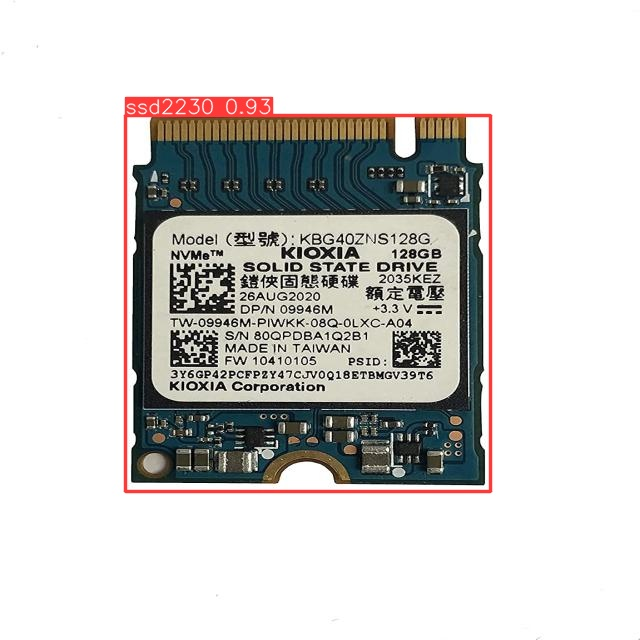

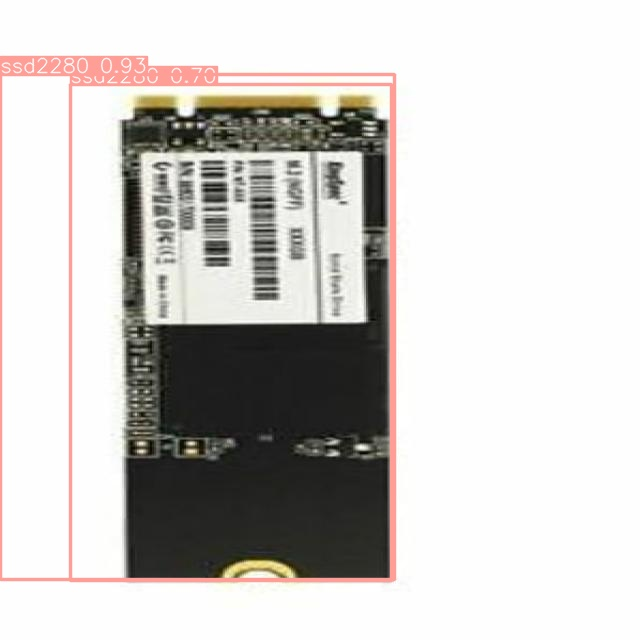

In [31]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg'):
      display(Image(filename=image_path, width=600))
      print("\n")